# Popular Data Science Questions

In this project, we are working for a company that creates data science content, we are tasked to figuring out what is the *best* content to write about. There are many possible interpretation of the word *best*, the direction we will go is to write content to help people learn data science, so we will re-frame the task down to the question **what is it that people want to learn about data science?**. 

While we can send a survey for people to answer the sort of data science topics they want to learn about, this approach would take a lot of time to gather the required information before we can conduct our analysis, amongst other challenges. A good proxy for this information is the sorts of data science topics people are asking online, which is a good indicator of the interest people have towards a particular data science topic. This information is much more readily available as there are records of the sorts of searches people use, making this information fully available for us to conduct our analysis. This allows us to further re-frame our question down to **what is it people are asking about data science?**. 

**Stack Exchange** is a popular question and answer website about programming as well as a multitude of other fields and subjects, which also includes [data-science](https://datascience.stackexchange.com/), which is the target website we will use to find the types of question people ask about Data Science. Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable. Data Science being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

- [Data Science](https://datascience.stackexchange.com/) - will be referred to as **DSSE**
- [Cross Validated](https://stats.stackexchange.com/) - a statistics site
- [Artificial Intelligence](https://ai.stackexchange.com/) - or AI
- [Mathematics](https://math.stackexchange.com/)
- [Stack Overflow](https://stackoverflow.com/) - for programming

If we want to include Data Engineering, we can also consider:

- [Data Administrators](https://dba.stackexchange.com/)
- [Unix & Linux](https://unix.stackexchange.com/)
- [Software Engineering](https://softwareengineering.stackexchange.com/)

The *tags* feature of Stack Exchange categorizes the types of question that is being asked, saving us the trouble of doing it ourselves. The next step involves accessing the data *en masse*, which can be solved using the public data base Stack Exchange provides for each of its websites, for example here is the [link](https://data.stackexchange.com/datascience/query/new) to the query to explore the DSSE's database. Since the database is hosted on Stack Exchange, and we do not have a direct connection to that database, we will utilise screenshots of the output results. The output results will be as of the time of writing on 30/04/21.

## Stack Exchange Data Explorer

Firstly we will explore the DSSE's data model. We will fetch all of the tables in the database using the following query

**<center>SELECT * FROM INFORMATION_SCHEMA.TABLES;</center>**

We get the following result from the query:

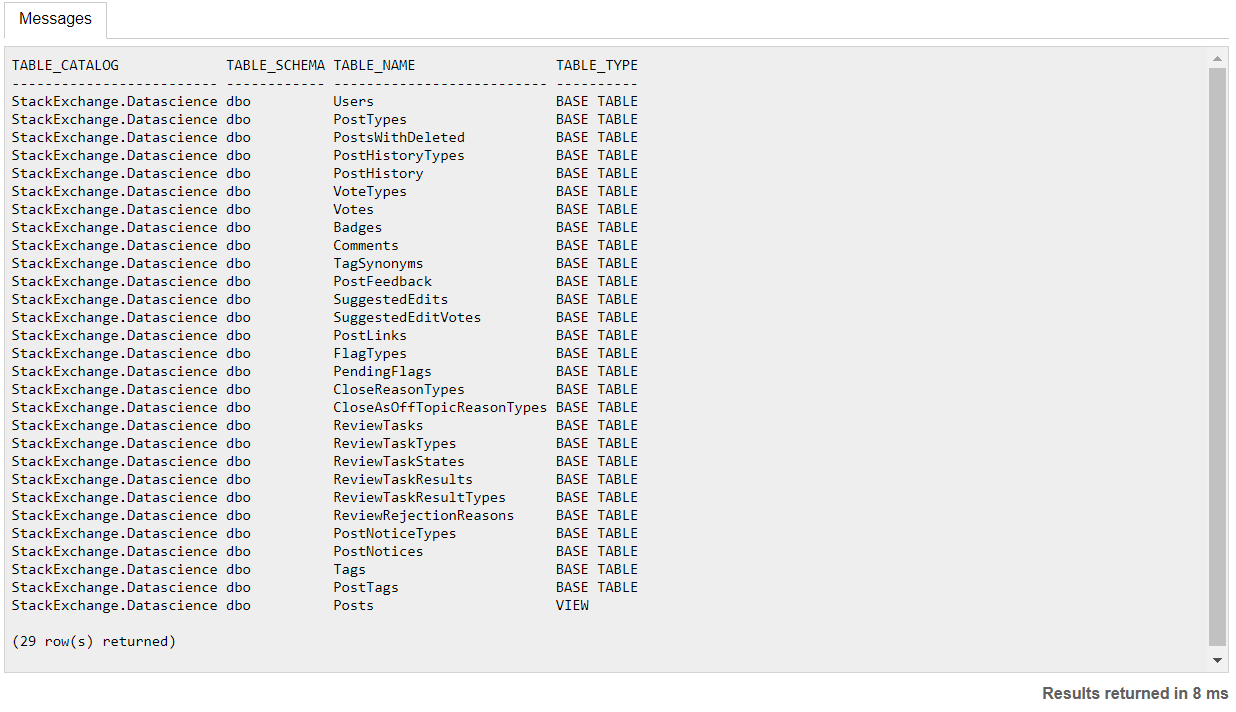

The most relevant table for us is the *Posts* table, we will retrieve all the column names in that table, using the following query:

**SELECT *<br>
FROM INFORMATION_SCHEMA.COLUMNS<br>
WHERE TABLE_NAME = 'Posts'**</br>

We get the following result from the query:
    
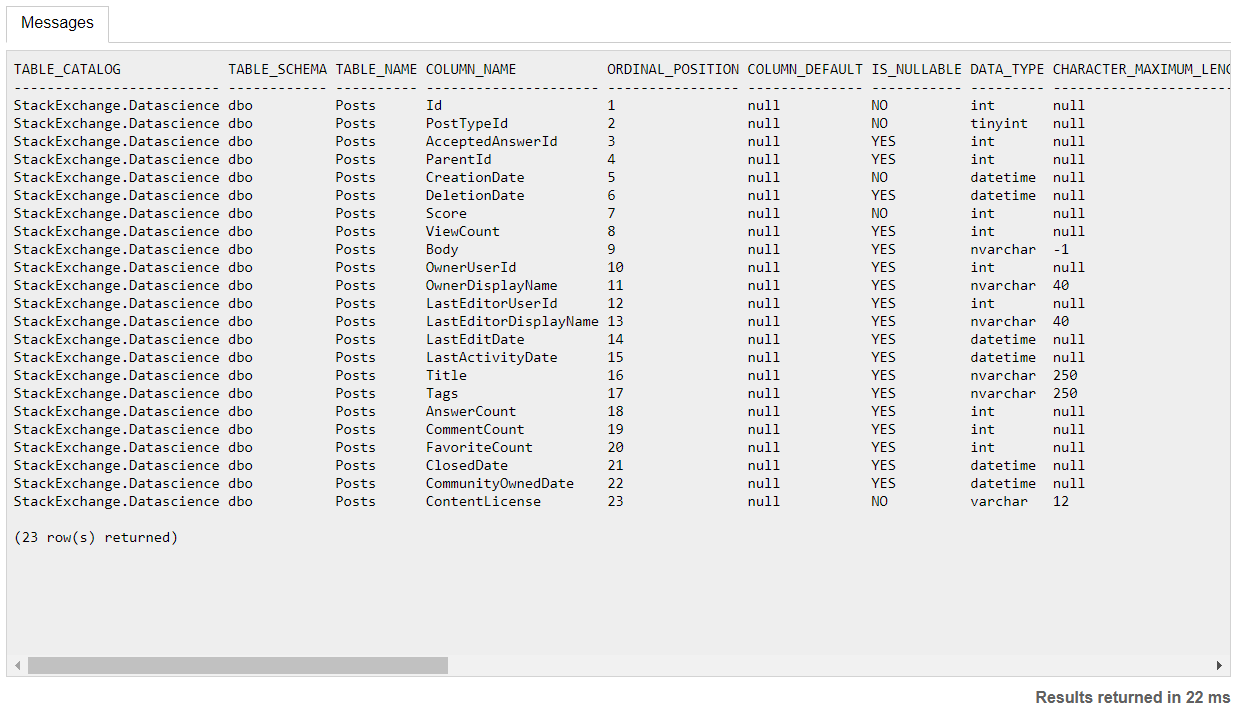

## Getting the Data

The posts table has a lot of columns. We will be focusing our attention on those that seem relevant towards our end goal. These columns are:

- **Id**: An identification number for the post
- **PostTypeId**: An identification number for the type of post
- **CreationDate**: The date and time of creation of the post
- **Score**: The post's score
- **ViewCount**: How many times the post was viewed
- **Tags**: What tags were used
- **AnswerCount**: How many answers the question got (only applicable to question posts)
- **FavoriteCount**: How many times the question was favored (only applicable to question posts)

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2020.

We can fetch the required data using the following query:

**SELECT Id,**<br>
       **&emsp;PostTypeId,**<br>
       **&emsp;CreationDate,**<br>
       **&emsp;Score,**<br>
       **&emsp;ViewCount,**<br>
       **&emsp;Tags,**<br>
       **&emsp;AnswerCount,**<br>
       **&emsp;FavoriteCount**<br>
**FROM posts**<br>
**WHERE YEAR(CreationDate) = 2020**<br>
**ORDER BY Id;**

We export the resulting query as a CSV named "2020_questions.csv" and then load it into Pandas for analysis.

## Exploring the Data

First we import all of our dependencies and then we read the CSV into the DataFrame named q_20 and then explore the basic characteristics of our dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('mode.chained_assignment', None)
q_20 = pd.read_csv("2020_questions.csv", encoding="UTF-8")
q_20

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,65677,2,2020-01-01 00:25:32,1,NaN,NaN,NaN,NaN
1,65678,1,2020-01-01 01:07:22,0,61.0,<machine-learning><deep-learning><data-mining>...,0.0,NaN
2,65680,1,2020-01-01 07:53:47,1,43.0,<python><k-means><image-segmentation>,1.0,NaN
3,65684,1,2020-01-01 11:27:44,4,302.0,<r><random-forest><bigdata>,2.0,1.0
4,65686,1,2020-01-01 13:56:11,1,158.0,<computer-vision><image-recognition><vae>,0.0,1.0
...,...,...,...,...,...,...,...,...
14205,87386,1,2020-12-31 18:54:56,0,11.0,<reinforcement-learning><matrix><learning>,0.0,NaN
14206,87387,1,2020-12-31 19:09:52,2,41.0,<machine-learning><data>,0.0,1.0
14207,87388,2,2020-12-31 19:24:31,2,NaN,NaN,NaN,NaN
14208,87389,1,2020-12-31 20:33:17,1,31.0,<neural-network><nlp><bert><transformer><langu...,1.0,NaN


In [2]:
q_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14210 entries, 0 to 14209
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             14210 non-null  int64  
 1   PostTypeId     14210 non-null  int64  
 2   CreationDate   14210 non-null  object 
 3   Score          14210 non-null  int64  
 4   ViewCount      7135 non-null   float64
 5   Tags           7135 non-null   object 
 6   AnswerCount    7135 non-null   float64
 7   FavoriteCount  963 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 888.2+ KB


Fortunately, the first four columns does not contain any blanks. However, the ViewCount, Tags and AnswerCount all contain the same number of missing values of 7,075. Upon inspecting one a Post which contains no Tags, the page gets redirected to the parent question, suggesting that the Post was in response to a question. Therefore we can safely remove any posts which has no tags. 

FavoriteCount has even more number of null values. Unlike the other columns, a value of 0 corresponds to a null value instead of a zero. Unlike with the previous four columns, we cannot drop all the null values in FavouriteCount. Instead we must fill those null values with 0.

If we inspect the types of each column, all of the columns which are expected to be in a numerical value is either an int64 or a float64 type. The CreationDate is expected to be a DateTime type. The Tags column is a text column, so unsurprisingly it is a object type column.

As for the tags column, we notice the entries in the Tags column follows the following pattern: \<tag_1>\<tag_2>...\<tag_n>. This means that we can replace certain patterns in the string, we can transform the tags into a list which is more easily processed by Python.

## Cleaning the Data

Firstly, we drop all the rows which has a null values in the tags, then fill the nulls in FavouriteCount with 0, then set the CreationDate to a datetime64[ns] type.

In [3]:
questions = q_20.dropna(subset=['Tags'])
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7135 entries, 1 to 14208
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7135 non-null   int64  
 1   PostTypeId     7135 non-null   int64  
 2   CreationDate   7135 non-null   object 
 3   Score          7135 non-null   int64  
 4   ViewCount      7135 non-null   float64
 5   Tags           7135 non-null   object 
 6   AnswerCount    7135 non-null   float64
 7   FavoriteCount  963 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 501.7+ KB


In [4]:
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)
questions = questions.reset_index()
questions

,index,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,1,65678,1,2020-01-01 01:07:22,0,61.0,<machine-learning><deep-learning><data-mining>...,0.0,0.0
1,2,65680,1,2020-01-01 07:53:47,1,43.0,<python><k-means><image-segmentation>,1.0,0.0
2,3,65684,1,2020-01-01 11:27:44,4,302.0,<r><random-forest><bigdata>,2.0,1.0
3,4,65686,1,2020-01-01 13:56:11,1,158.0,<computer-vision><image-recognition><vae>,0.0,1.0
4,6,65688,1,2020-01-01 16:17:40,2,143.0,<machine-learning><neural-network><deep-learni...,1.0,0.0
...,...,...,...,...,...,...,...,...,...
7130,14203,87384,1,2020-12-31 18:10:08,0,44.0,<machine-learning><classification><nlp><sentim...,0.0,0.0
7131,14204,87385,1,2020-12-31 18:42:16,0,20.0,<data><sampling><bias>,0.0,0.0
7132,14205,87386,1,2020-12-31 18:54:56,0,11.0,<reinforcement-learning><matrix><learning>,0.0,0.0
7133,14206,87387,1,2020-12-31 19:09:52,2,41.0,<machine-learning><data>,0.0,1.0


In [5]:
questions['CreationDate'] = questions['CreationDate'].astype('datetime64[ns]')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7135 entries, 0 to 7134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          7135 non-null   int64         
 1   Id             7135 non-null   int64         
 2   PostTypeId     7135 non-null   int64         
 3   CreationDate   7135 non-null   datetime64[ns]
 4   Score          7135 non-null   int64         
 5   ViewCount      7135 non-null   float64       
 6   Tags           7135 non-null   object        
 7   AnswerCount    7135 non-null   float64       
 8   FavoriteCount  7135 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 501.8+ KB


Next we will be converting the individual tags into a list. First we will be cleaning the Tags column, by first replacing "\><" with "," then removing the other square brackets. Then we will use the str.split method to convert the string into a list, by splitting on the "," delimiter.

In [6]:
questions['Tags'] = questions['Tags'].str.replace("><",",")
questions['Tags'] = questions['Tags'].str.replace("<","")
questions['Tags'] = questions['Tags'].str.replace(">","")
questions['Tags'] = questions['Tags'].str.split(",")
questions

,index,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,1,65678,1,2020-01-01 01:07:22,0,61.0,"[machine-learning, deep-learning, data-mining,...",0.0,0.0
1,2,65680,1,2020-01-01 07:53:47,1,43.0,"[python, k-means, image-segmentation]",1.0,0.0
2,3,65684,1,2020-01-01 11:27:44,4,302.0,"[r, random-forest, bigdata]",2.0,1.0
3,4,65686,1,2020-01-01 13:56:11,1,158.0,"[computer-vision, image-recognition, vae]",0.0,1.0
4,6,65688,1,2020-01-01 16:17:40,2,143.0,"[machine-learning, neural-network, deep-learni...",1.0,0.0
...,...,...,...,...,...,...,...,...,...
7130,14203,87384,1,2020-12-31 18:10:08,0,44.0,"[machine-learning, classification, nlp, sentim...",0.0,0.0
7131,14204,87385,1,2020-12-31 18:42:16,0,20.0,"[data, sampling, bias]",0.0,0.0
7132,14205,87386,1,2020-12-31 18:54:56,0,11.0,"[reinforcement-learning, matrix, learning]",0.0,0.0
7133,14206,87387,1,2020-12-31 19:09:52,2,41.0,"[machine-learning, data]",0.0,1.0


We are now left with a dataset which only contains the relevant rows relating to the quesitons that has been asked on DSSE in 2020. The tags are has been converted to a Python list object which is much easier to process.

## Most Used and Most Viewed

The next step in finding involves finding the number of instances of the individual tags as well as the View Count associated with those tags. We can do this by duplicating a row for each tag in the list. Fortunately, we can use DataFrame.explode() method to complete this task.

In [7]:
questions_explode = questions.explode('Tags')
questions_explode

,index,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,1,65678,1,2020-01-01 01:07:22,0,61.0,machine-learning,0.0,0.0
0,1,65678,1,2020-01-01 01:07:22,0,61.0,deep-learning,0.0,0.0
0,1,65678,1,2020-01-01 01:07:22,0,61.0,data-mining,0.0,0.0
0,1,65678,1,2020-01-01 01:07:22,0,61.0,statistics,0.0,0.0
0,1,65678,1,2020-01-01 01:07:22,0,61.0,logistic-regression,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7134,14208,87389,1,2020-12-31 20:33:17,1,31.0,neural-network,1.0,0.0
7134,14208,87389,1,2020-12-31 20:33:17,1,31.0,nlp,1.0,0.0
7134,14208,87389,1,2020-12-31 20:33:17,1,31.0,bert,1.0,0.0
7134,14208,87389,1,2020-12-31 20:33:17,1,31.0,transformer,1.0,0.0


Next we create a PivotTable aggregating by the Count of each tag as well as the sum of the View Count at a Tag level.

In [8]:
pivot = questions_explode.pivot_table(values=['ViewCount'], index='Tags', aggfunc=['sum','count'])
pivot

,sum,count
,ViewCount,ViewCount
Tags,,
3d-object-detection,76.0,2
3d-reconstruction,76.0,3
ab-test,392.0,11
accuracy,34931.0,93
activation-function,10151.0,43
...,...,...
word,222.0,4
word-embeddings,21941.0,106


We have the Top 30 tags by View Count, as well as the Top 30 Tags by number of occurrences.

,ViewCount
Tags,
python,427422.0
machine-learning,397057.0
keras,250012.0
pandas,181508.0
deep-learning,179008.0
tensorflow,177159.0
scikit-learn,157420.0
neural-network,142311.0
nlp,119929.0


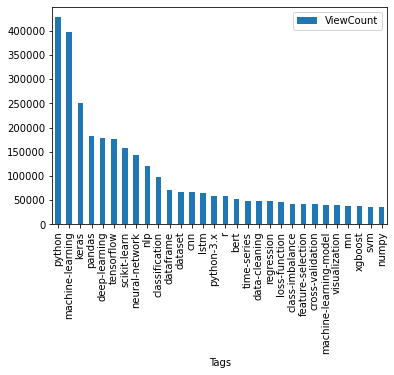

In [9]:
top_30_views = pivot['sum'].sort_values('ViewCount', ascending=False).head(30)
top_30_views.plot(kind='bar')
top_30_views

,Count
Tags,
machine-learning,2128
python,1351
deep-learning,1021
neural-network,822
keras,644
classification,617
nlp,565
tensorflow,548
scikit-learn,487


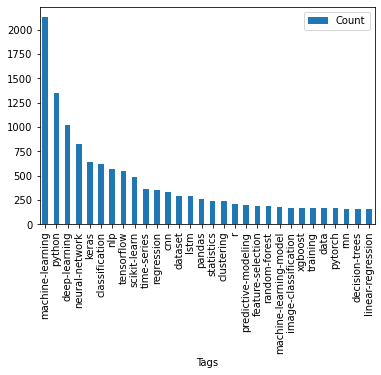

In [10]:
top_30_counts = pivot['count'].sort_values('ViewCount', ascending=False).head(30)
top_30_counts.columns = ['Count']
top_30_counts.plot(kind='bar')
top_30_counts

## Relations between tags

Now that we have broken down the View Count and occurrences by individual tags, we want to identify relationships between tags. We will first identify potential relationships between pairs of of tags. In this section, we will brainstorm potential analytical solutions to tackle this challenge, where we derive insights from the data using various techniques, which is a more bottom-up approach. In the next section, we will take a more top-down approach, where we look at an overview of the data along with our previous experiences in order to reach a conclusion.

To start off, we can do this is to find the proportion of times one tag appears with another tag. We can do this by creating a frequency table of the occurences for each particular pair of tags. Then we divide the tag pair occurence by the total times the first Tag has occurred. Then we present the information in a two-way table, where each cell represent the proportion of a particular tag pair occured out of the total, as well as presenting a heat map. Due to the sheer number of individual tags, for clarity, we will only show the table and heat map for the top 15 tags.

In [11]:
tag_pairs_ft = {}

for row in questions.iterrows():   
    tags = tuple(sorted(row[1]['Tags']))
    if len(tags) == 1:
        tags = (tags[0],"No Second Tag")
        if tags in tag_pairs_ft.keys():
            tag_pairs_ft[tags] += 1
        else:
            tag_pairs_ft[tags] = 1        
    elif len(tags) == 2:
        if tags in tag_pairs_ft.keys():
            tag_pairs_ft[tags] += 1
        else:
            tag_pairs_ft[tags] = 1
    else:
        for x in range(len(tags)-1):
            for y in range(x+1,len(tags)):
                tag = (tags[x],tags[y])
                if tag in tag_pairs_ft.keys():
                    tag_pairs_ft[tag] += 1
                else:
                    tag_pairs_ft[tag] = 1

sorted_ft = pd.DataFrame(sorted(tag_pairs_ft.items(), key=lambda x:x[1], reverse = True), columns=["Tag Pair", "Count"])
sorted_ft['Tag 1'] = sorted_ft['Tag Pair'].map(lambda x:x[0])
sorted_ft['Tag 2'] = sorted_ft['Tag Pair'].map(lambda x:x[1])
sorted_ft = sorted_ft[['Tag Pair', 'Tag 1', 'Tag 2', 'Count']]
print('Total Tag Pair occurences is {}'.format(sorted_ft['Count'].sum()))
sorted_ft

Total Tag Pair occurences is 32222


,Tag Pair,Tag 1,Tag 2,Count
0,"(deep-learning, machine-learning)",deep-learning,machine-learning,397
1,"(machine-learning, python)",machine-learning,python,372
2,"(machine-learning, neural-network)",machine-learning,neural-network,279
3,"(keras, tensorflow)",keras,tensorflow,277
4,"(deep-learning, neural-network)",deep-learning,neural-network,264
...,...,...,...,...
8719,"(multiclass-classification, transformer)",multiclass-classification,transformer,1
8720,"(smote, transformer)",smote,transformer,1
8721,"(bias, data)",bias,data,1
8722,"(learning, matrix)",learning,matrix,1


In [12]:
tag1_pivot_table = sorted_ft.pivot_table(values = 'Count', index="Tag 1", aggfunc='sum').sort_values(by='Count', ascending=False)

sorted_ft_comb = sorted_ft.merge(right = tag1_pivot_table, left_on = 'Tag 1', right_index = True, how='left')
sorted_ft_comb['Proportion of 1st Tag'] = round(sorted_ft_comb['Count_x'] / sorted_ft_comb['Count_y'],3)*100
sorted_ft_comb.columns = ['Tag Pair', 'Tag 1', 'Tag 2', 'Tag Pair Occurences', 'Total Tag 1 Occurence', 'Proportion of 1st Tag']
sorted_ft_comb

,Tag Pair,Tag 1,Tag 2,Tag Pair Occurences,Total Tag 1 Occurence,Proportion of 1st Tag
0,"(deep-learning, machine-learning)",deep-learning,machine-learning,397,2391,16.6
1,"(machine-learning, python)",machine-learning,python,372,3107,12.0
2,"(machine-learning, neural-network)",machine-learning,neural-network,279,3107,9.0
3,"(keras, tensorflow)",keras,tensorflow,277,1261,22.0
4,"(deep-learning, neural-network)",deep-learning,neural-network,264,2391,11.0
...,...,...,...,...,...,...
8719,"(multiclass-classification, transformer)",multiclass-classification,transformer,1,117,0.9
8720,"(smote, transformer)",smote,transformer,1,9,11.1
8721,"(bias, data)",bias,data,1,80,1.2
8722,"(learning, matrix)",learning,matrix,1,18,5.6


In [13]:
prop_pivot_table = sorted_ft_comb.pivot_table(values = 'Proportion of 1st Tag', index = 'Tag 2', aggfunc = 'sum').sort_values(by='Proportion of 1st Tag', ascending = False)

row_order = tag1_pivot_table.index.tolist()
column_order = prop_pivot_table.index.tolist()

tags_pivot_table = sorted_ft_comb.pivot_table(values = 'Proportion of 1st Tag', index="Tag 1", columns='Tag 2', aggfunc='sum')
tags_pivot_table = tags_pivot_table.reindex(row_order, columns=column_order)
reduced_table = tags_pivot_table.iloc[0:15,0:15]
reduced_table

Tag 2,python,machine-learning,No Second Tag,tensorflow,time-series,statistics,scikit-learn,neural-network,nlp,regression,visualization,r,training,xgboost,reinforcement-learning
Tag 1,,,,,,,,,,,,,,,
machine-learning,12.0,NaN,2.0,3.7,3.2,2.9,5.2,9.0,4.7,3.8,0.5,1.6,1.8,1.9,1.1
deep-learning,5.1,16.6,0.7,6.3,2.0,0.7,0.2,11.0,3.9,0.8,0.2,0.1,1.3,0.1,0.8
classification,6.0,15.3,1.1,0.5,1.9,1.0,3.3,4.0,2.2,2.3,0.3,0.7,0.8,1.0,0.3
keras,13.7,10.1,1.3,22.0,2.6,0.1,1.6,10.2,1.4,1.7,0.2,0.5,1.5,0.1,0.3
python,NaN,NaN,2.2,12.3,5.2,2.9,18.6,NaN,NaN,5.6,2.4,2.4,1.6,3.0,1.2
cnn,4.0,8.9,0.7,5.9,1.2,NaN,0.3,9.1,0.6,0.6,0.2,NaN,1.2,0.1,0.3
neural-network,11.1,NaN,2.8,12.6,3.9,1.1,1.5,NaN,4.9,4.2,0.7,1.5,4.9,0.4,2.0
nlp,11.6,NaN,3.2,3.0,0.1,0.8,2.5,NaN,NaN,0.6,0.1,0.8,0.6,NaN,NaN
clustering,9.0,9.7,2.1,0.5,1.6,0.7,3.7,0.3,2.1,0.9,1.4,2.1,NaN,NaN,0.3


<AxesSubplot:xlabel='Tag 2', ylabel='Tag 1'>

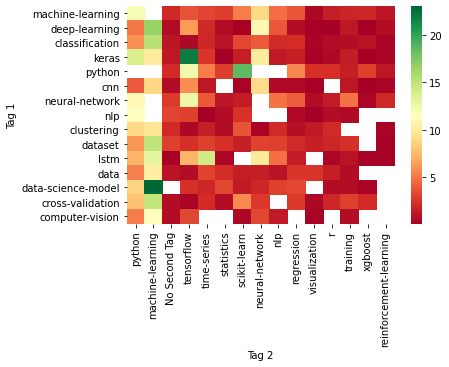

In [14]:
sns.heatmap(reduced_table, cmap='RdYlGn')

If we want to extend this analysis so that we are looking for relationships between multiple tags, we can use the two way table we created above and then look for how one tag links to another, then that tag to another, and so on. The idea is to look for strong high number proportions of groups of tags appearing together. The technical term for this is looking for clusters of tags. Fortunately, there is are analytical techniques, such as *K-Means clustering*, to solve this challenges however this may not be the most efficient approach to tackle this challenge.

## Enter Domain Knowledge

In this section, we will take another approach where we apply our [domain knowledge](https://en.wikipedia.org/wiki/Domain_knowledge), where use it to identify the common link between the top tags.

Here is the top 30 tags based on View Count:

In [15]:
common_top_30 = pd.merge(left=top_30_views, right=top_30_counts, left_index=True, right_index=True)
common_top_30

,ViewCount,Count
Tags,,
python,427422.0,1351
machine-learning,397057.0,2128
keras,250012.0,644
pandas,181508.0,262
deep-learning,179008.0,1021
tensorflow,177159.0,548
scikit-learn,157420.0,487
neural-network,142311.0,822
nlp,119929.0,565


We know that *Python* is a programming language, which are tools used to solve various technical problems, other tags which fall into this category are *R* and *Pandas*.

The next highest viewed tag is *Machine Learning* which are different analytical techniques used to solve various problems, one of which we previously noted is "K-Means Clustering". Other tags which fall under this category are:

- Deep-Learning: A subset of Machine learning models
- Neural-network: A deep-learning algorithm
- Keras: A deep learning tool
- Tensorflow: A machine learning platform
- Scikit-Learn: A machine learning tool in Python
- NLP: Stands for Natural Language Processing, which is techniques used to analyze sound data
- Classification: Involves choosing the most appropriate model to solve the problem
- LSTM: Stands for Long-term Short-Term memory, which is a field in deep learning
- Regression: A traditional Machine learning model

We also have data related tags including *dataset* and *time-series* which is data across time.

As we can see majority of the most viewed data science subjects involve Machine Learning, particularly deep learning. The data indicates that Machine learning, particularly deep learning, on Python are the topics people are asking the most. However, before we can make our recommendation, it is important to check whether deep learning is just a fad or whether it is here to stay. 

## Just a fad?

The dataset we will use for this analysis is every post on DSSE, where the Tags is not NULL. This ensures that we are only selecting the questions that has been asked. The query we will use to generate this data is:

**SELECT Id,**<br>
       **&emsp;PostTypeId,**<br>
       **&emsp;CreationDate,**<br>
       **&emsp;Score,**<br>
       **&emsp;ViewCount,**<br>
       **&emsp;Tags,**<br>
       **&emsp;AnswerCount,**<br>
       **&emsp;FavoriteCount**<br>
**FROM posts**<br>
**WHERE Tags IS NOT NULL**<br>
**ORDER BY Id;**

We export the resulting query as a CSV named "all_questions.csv" and then load it into Pandas for analysis. Here is the adjustments we will make on the DataFrame:

- Cleaning the tags column so that each tag will be a Python list object
- Convert the CreationDate into a DateTime object
- Create a column which extract the Year and Month of the creation date
- Create a column which indicates whether the question is a 'deep-learning' question

In [16]:
all_q = pd.read_csv("all_questions.csv", encoding="UTF-8")
all_q['CreationDate'] = all_q['CreationDate'].astype('datetime64[ns]')
all_q['%Y-%m'] = all_q['CreationDate'].dt.strftime('%Y-%m')
all_q['Tags'] = all_q['Tags'].str.replace("><",",")
all_q['Tags'] = all_q['Tags'].str.replace("<","")
all_q['Tags'] = all_q['Tags'].str.replace(">","")
all_q['Tags'] = all_q['Tags'].str.split(",")
all_q['Deep Learning Questions'] = all_q['Tags'].apply(lambda x: 1 if 'deep-learning' in x else 0)
all_q

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,%Y-%m,Deep Learning Questions
0,5,1,2014-05-13 23:58:30,9,783,[machine-learning],1,1.0,2014-05,0
1,7,1,2014-05-14 00:11:06,4,458,"[education, open-source]",3,1.0,2014-05,0
2,14,1,2014-05-14 01:25:59,25,1835,"[data-mining, definitions]",4,6.0,2014-05,0
3,15,1,2014-05-14 01:41:23,2,648,[databases],0,NaN,2014-05,0
4,16,1,2014-05-14 01:57:56,17,403,"[machine-learning, bigdata, libsvm]",2,NaN,2014-05,0
...,...,...,...,...,...,...,...,...,...,...
28516,93790,1,2021-04-30 15:41:00,0,15,"[feature-extraction, dimensionality-reduction,...",0,NaN,2021-04,0
28517,93791,1,2021-04-30 15:41:25,0,9,"[deep-learning, neural-network, reinforcement-...",0,NaN,2021-04,1
28518,93793,1,2021-04-30 16:54:15,1,19,"[deep-learning, pytorch]",0,NaN,2021-04,1
28519,93799,1,2021-04-30 20:45:17,0,7,"[python, finance, bokeh]",0,NaN,2021-04,0


Next we will create a PivotTable of the number of deep-learning questions, total number of questions and proportion of deep-learning questions aggregated down to a monthly level, then we will plot that PivotTable as a line graph.

<AxesSubplot:title={'center':'Total Monthly Deep Learning questions'}, xlabel='Year - Month'>

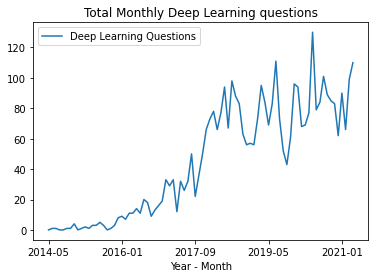

In [17]:
deep_learning_pivot = all_q.pivot_table(values = 'Deep Learning Questions', index = '%Y-%m', aggfunc = 'sum')
deep_learning_pivot.plot(kind='line', title = 'Total Monthly Deep Learning questions', xlabel = 'Year - Month')

There is an upward trend in the number of total deep learning questions asked on a montly basis, which has slowed down near the end of 2018 / beginning of 2019. However this does not give us a complete picture yet as these figures lack a frame of reference being the total number of questions asked.

<AxesSubplot:title={'center':'Total Monthly questions asked'}, xlabel='Year - Month'>

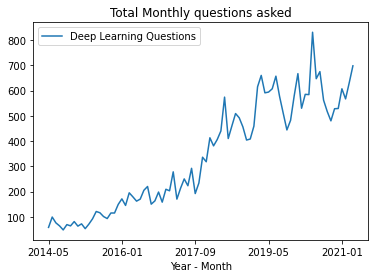

In [18]:
deep_learning_pivot_prop = all_q.pivot_table(values = 'Deep Learning Questions', index = '%Y-%m', aggfunc = 'count')
deep_learning_pivot_prop.plot(kind='line', title = 'Total Monthly questions asked', xlabel = 'Year - Month')

There is a continuous upward trend in the number of questions asked on the Data Science Stack Exchange. This suggests that Data Science as a discipline is growing over time. Which means that Data Science as a discipline overall isn't a fad.

<AxesSubplot:title={'center':'Proportion of deep learning questions'}, xlabel='Year - Month'>

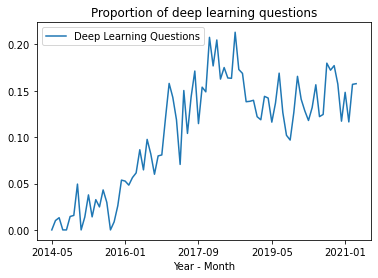

In [19]:
deep_learning_pivot_prop = all_q.pivot_table(values = 'Deep Learning Questions', index = '%Y-%m', aggfunc = 'mean')
deep_learning_pivot_prop.plot(kind='line', title = 'Proportion of deep learning questions', xlabel = 'Year - Month')

The proportion of Deep Learning questions asked follows the pattern in the Total number of Deep Learning questions asked, where there is an upward trend until the end of 2018 / beginning of 2019, then dropped and stabalised at around 15%. This suggests that deep-learning as a field had a strong period of growth and has now stablised. There is still an increasing interest in deep-learning, however that is more attributed to the increasing popularity of data science as a whole. This suggests that deep-learning is here to stay.

# Conclusion

Deep Learning and Machine Learning topics in general would be a safe topics to create as those topics are very commonly asked on DSSE. However we should not tunnel into just those topics as there are many other opportunities as Data Science discipline as a whole is always growing. Other topics to consider would be content that can help beginners get into this field so we can cultivate the growing discipline further, as well as intermediate topics such as tips and tricks those who are already in the discipline can appreciate. 

Another perspective to consider would be topics that aren't popular which are important for a Data Scientist. These topics would be under represented in the field and thus allow us to write content to fill that particular niche. It's important to note that just because a topic is neglected doesn't mean that there isn't opportunity for us to write on that particular topics, especially if a particular field adds value for a Data Scientist, but it is often overlooked.

Another area to consider would be non-technical areas such as topics involving Domain Knowledge and Business Acumen. We won't be able to track these types of questions on DSSE as DSSE feature technical question often involving programming. Another reason to consider these types of topics is that tertiary education would often focus on the technical aspect of being a data scientist and neglect how the technical skills can be used to add value to an employer. 